In [1]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read the dataset
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
df_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [ ]:
## Target is the output variable

In [ ]:
## Understand the type of data.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [ ]:
### Check if there are any biases in your dataset.

In [7]:
for c in df_train.columns:
    #print("column values: ",c)
    cardinality = len(np.unique(df_train[c]))
    #print(cardinality)

    if cardinality == 1:
        print(c)
        #df_train.drop(c, axis=1) 

        #df_test.drop(c, axis=1)

elimbasu5


In [8]:
df_train.drop("elimbasu5", axis=1, inplace=True) #dropped the column because the variance is equal to zero

In [ ]:
#### elimbasu5 is biase in the training data set

In [11]:
df_test.drop("elimbasu5", axis=1, inplace=True) #dropped the column because the variance is equal to zero

In [ ]:
##Null value calculation

In [12]:
temp = df_train.isnull().sum();

columns = df_train.columns
count = 0;
for i in range(len(temp)):
    if(temp[i] > 0):
        print(columns[i])
        count += 1;
        
if(count == 0):
    print("No null value found in any columns");


v2a1
v18q1
rez_esc
meaneduc
SQBmeaned


In [16]:
df_train.apply(lambda x: sum(x.isnull()))

Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Target             0
Length: 142, dtype: int64

In [17]:
df_train.dropna(inplace=True)

In [18]:
df_train.isna().sum()

Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Target             0
Length: 142, dtype: int64

In [15]:
df_train.isnull().sum()

Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Target             0
Length: 142, dtype: int64

In [19]:
temp = df_test.isnull().sum();
columns = df_test.columns
count = 0;
for i in range(len(temp)):
    if(temp[i] > 0):
        print(columns[i])
        count += 1;
        
if(count == 0):
    print("No null value found in any columns");


v2a1
v18q1
rez_esc
meaneduc
SQBmeaned


In [20]:
df_test.isnull().sum()

Id                     0
v2a1               17403
hacdor                 0
rooms                  0
hacapo                 0
                   ...  
SQBhogar_nin           0
SQBovercrowding        0
SQBdependency          0
SQBmeaned             31
agesq                  0
Length: 141, dtype: int64

In [21]:
df_test.dropna(inplace=True)

In [22]:
df_test.isna().sum()

Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
                  ..
SQBhogar_nin       0
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Length: 141, dtype: int64

In [23]:
df_train[df_train.duplicated()]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target


In [24]:
df_test[df_test.duplicated()]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq


In [25]:
#Filter categorical variables
categorical_columns = [x for x in df_train.dtypes.index if df_train.dtypes[x]=='object']
#Exclude ID cols:
categorical_columns = [x for x in categorical_columns if x not in ['Id','idhogar']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df_train[col].value_counts())


Frequency of Categories for varible dependency
yes          69
1.5          30
.5           19
2            16
.66666669     6
.75           5
4             4
.33333334     3
.25           2
.22222222     1
1.3333334     1
Name: dependency, dtype: int64

Frequency of Categories for varible edjefe
no    40
11    24
17    14
8     13
9     13
16    10
15     9
14     8
21     7
10     5
6      5
12     3
7      2
13     1
5      1
18     1
Name: edjefe, dtype: int64

Frequency of Categories for varible edjefa
no     118
11       7
15       5
9        4
6        4
7        3
10       3
14       3
17       2
8        2
13       1
4        1
12       1
yes      1
16       1
Name: edjefa, dtype: int64


In [26]:
#encoding
df_train['edjefe'] = df_train['edjefe'].replace(['yes', 'no'], ['1', '0'])
df_train['edjefa'] = df_train['edjefa'].replace(['yes', 'no'], ['1', '0'])
df_train['dependency'] = df_train['dependency'].replace(['yes', 'no'], ['1', '0'])

In [27]:
#Filter categorical variables
categorical_columns = [x for x in df_train.dtypes.index if df_train.dtypes[x]=='object']
#Exclude ID cols:
categorical_columns = [x for x in categorical_columns if x not in ['Id','idhogar']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df_train[col].value_counts())


Frequency of Categories for varible dependency
1            69
1.5          30
.5           19
2            16
.66666669     6
.75           5
4             4
.33333334     3
.25           2
.22222222     1
1.3333334     1
Name: dependency, dtype: int64

Frequency of Categories for varible edjefe
0     40
11    24
17    14
8     13
9     13
16    10
15     9
14     8
21     7
10     5
6      5
12     3
7      2
13     1
5      1
18     1
Name: edjefe, dtype: int64

Frequency of Categories for varible edjefa
0     118
11      7
15      5
9       4
6       4
7       3
10      3
14      3
17      2
8       2
13      1
4       1
12      1
1       1
16      1
Name: edjefa, dtype: int64


In [28]:
df_train[['edjefe', 'edjefa', 'dependency']] = df_train[['edjefe', 'edjefa','dependency']].apply(pd.to_numeric)

In [31]:
print(df_train.dtypes['edjefe'])
print(df_train.dtypes['edjefa'])
print(df_train.dtypes['dependency'])

int64
int64
float64


In [32]:
df_train.drop('Id', axis=1, inplace=True)
df_train.drop('idhogar', axis=1, inplace=True)

In [44]:
df_test.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
count,4.480000e+02,448.000000,448.000000,448.000000,448.000000,448.000000,448.0,448.000000,448.000000,448.000000,...,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,2.332266e+05,0.015625,5.455357,0.004464,0.995536,0.986607,1.0,1.419643,0.578125,1.524554,...,11.725446,32.671875,147.310268,20.685268,105.296875,5.578125,2.870766,1.612124,153.228549,147.310268
std,2.132297e+05,0.124158,1.562356,0.066741,0.066741,0.115078,0.0,0.758409,0.697175,0.911927,...,3.137858,31.309338,74.853322,12.002295,107.225822,4.828899,2.216514,1.649494,96.805583,74.853322
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,...,7.000000,0.000000,49.000000,4.000000,0.000000,1.000000,0.360000,0.040000,6.250000,49.000000
25%,1.000000e+05,0.000000,4.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,...,9.000000,4.000000,81.000000,16.000000,0.000000,4.000000,1.777778,0.890625,72.250000,81.000000
50%,1.730810e+05,0.000000,5.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,...,12.000000,25.000000,144.000000,16.000000,81.000000,4.000000,2.250000,1.000000,132.250000,144.000000
75%,3.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,1.0,2.000000,1.000000,2.000000,...,14.000000,49.000000,196.000000,25.000000,196.000000,9.000000,4.000000,2.250000,217.562500,196.000000
max,2.852700e+06,1.000000,12.000000,1.000000,1.000000,1.000000,1.0,6.000000,3.000000,5.000000,...,17.000000,121.000000,289.000000,64.000000,441.000000,36.000000,16.000000,9.000000,784.000000,289.000000


In [36]:
#Filter categorical variables
categorical_columns = [x for x in df_test.dtypes.index if df_test.dtypes[x]=='object']
#Exclude ID cols:
categorical_columns = [x for x in categorical_columns if x not in ['Id','idhogar']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df_test [col].value_counts())



Frequency of Categories for varible dependency
yes          188
1.5           75
.5            55
2             54
.33333334     24
.66666669     16
.60000002      9
3              9
2.5            5
1.3333334      5
.25            4
.75            2
.2             1
.40000001      1
Name: dependency, dtype: int64

Frequency of Categories for varible edjefe
no    134
11     53
6      52
14     36
15     31
17     30
9      29
16     23
12     11
13      7
3       7
7       7
21      6
8       5
5       5
10      5
4       4
19      2
20      1
Name: edjefe, dtype: int64

Frequency of Categories for varible edjefa
no    315
6      26
15     17
17     16
16     16
11     15
14      9
7       8
12      8
13      7
9       7
3       1
10      1
5       1
8       1
Name: edjefa, dtype: int64


In [37]:
#encoding
df_test['edjefe'] = df_test['edjefe'].replace(['yes', 'no'], ['1', '0'])
df_test['edjefa'] = df_test['edjefa'].replace(['yes', 'no'], ['1', '0'])
df_test['dependency'] = df_test['dependency'].replace(['yes', 'no'], ['1', '0'])

In [38]:
df_test[['edjefe', 'edjefa', 'dependency']] = df_test[['edjefe', 'edjefa','dependency']].apply(pd.to_numeric)

In [39]:
print(df_test.dtypes['edjefe'])
print(df_test.dtypes['edjefa'])
print(df_test.dtypes['dependency'])

int64
int64
float64


In [40]:
df_test.drop('Id', axis=1, inplace=True)
df_test.drop('idhogar', axis=1, inplace=True)

In [45]:
df_test.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
count,4.480000e+02,448.000000,448.000000,448.000000,448.000000,448.000000,448.0,448.000000,448.000000,448.000000,...,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,2.332266e+05,0.015625,5.455357,0.004464,0.995536,0.986607,1.0,1.419643,0.578125,1.524554,...,11.725446,32.671875,147.310268,20.685268,105.296875,5.578125,2.870766,1.612124,153.228549,147.310268
std,2.132297e+05,0.124158,1.562356,0.066741,0.066741,0.115078,0.0,0.758409,0.697175,0.911927,...,3.137858,31.309338,74.853322,12.002295,107.225822,4.828899,2.216514,1.649494,96.805583,74.853322
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,...,7.000000,0.000000,49.000000,4.000000,0.000000,1.000000,0.360000,0.040000,6.250000,49.000000
25%,1.000000e+05,0.000000,4.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,...,9.000000,4.000000,81.000000,16.000000,0.000000,4.000000,1.777778,0.890625,72.250000,81.000000
50%,1.730810e+05,0.000000,5.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.000000,...,12.000000,25.000000,144.000000,16.000000,81.000000,4.000000,2.250000,1.000000,132.250000,144.000000
75%,3.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,1.0,2.000000,1.000000,2.000000,...,14.000000,49.000000,196.000000,25.000000,196.000000,9.000000,4.000000,2.250000,217.562500,196.000000
max,2.852700e+06,1.000000,12.000000,1.000000,1.000000,1.000000,1.0,6.000000,3.000000,5.000000,...,17.000000,121.000000,289.000000,64.000000,441.000000,36.000000,16.000000,9.000000,784.000000,289.000000


In [42]:
df_train.columns

Index(['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1',
       'r4h1', 'r4h2',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=140)

In [43]:
df_test.columns

Index(['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1',
       'r4h1', 'r4h2',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
       'agesq'],
      dtype='object', length=139)

In [46]:
y = df_train['Target'];
df_train = df_train.drop('Target',axis=1)

In [47]:
df_train.columns

Index(['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1',
       'r4h1', 'r4h2',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
       'agesq'],
      dtype='object', length=139)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='v2a1'>

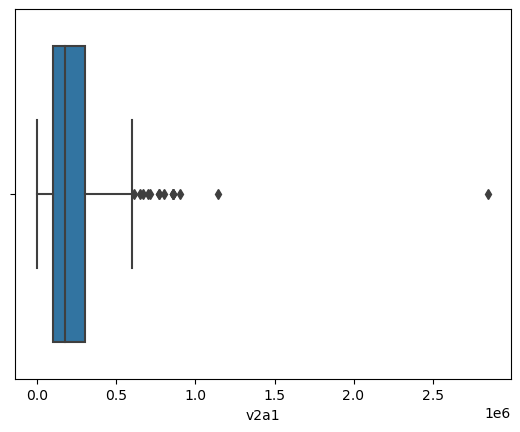

In [48]:
import seaborn as sns
sns.boxplot(df_test['v2a1'])

In [49]:
out1=np.where(df_test['v2a1']>.8)
out1

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
         67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132,
        133, 134, 135, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
        148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 161,
        162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
        175, 176, 177, 178, 179, 180, 181, 182, 183

In [50]:
df_train1=pd.read_csv('train.csv')

In [51]:
test2 = df_train1.groupby('idhogar')['Target'].apply(lambda X:len(X.unique())==1)

In [52]:
for i in test2:
    print(i)
    

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
False
True
True
True
True
True
True
True
True
Tru

In [55]:
count=0;
count2=0;
for i in test2:
    if(i==True):
        count+=1;
    if(i==False):
        count2+=1;
    
print("All members of the house have the same poverty level:",count)
print("All members of the house dont have the same poverty level:",count2)

All members of the house have the same poverty level: 2903
All members of the house dont have the same poverty level: 85


In [61]:
df_train1.parentesco1

0       1
1       1
2       1
3       0
4       0
       ..
9552    1
9553    0
9554    0
9555    0
9556    0
Name: parentesco1, Length: 9557, dtype: int64

In [63]:
count=0;
for val in df_train1.parentesco1:
    if(val==0):
        count+=1;
print("house without a family head", count)

house without a family head 6584


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit_transform(df_train[df_train.columns])


array([[1.91431067e-01, 0.00000000e+00, 3.75000000e-01, ...,
        5.95975232e-02, 1.42857143e-01, 1.00000000e+00],
       [1.91431067e-01, 0.00000000e+00, 3.75000000e-01, ...,
        5.95975232e-02, 1.42857143e-01, 6.25000000e-02],
       [3.94826575e-01, 0.00000000e+00, 5.00000000e-01, ...,
        1.25773994e-02, 3.22916667e-01, 1.00000000e+00],
       ...,
       [1.55537742e-01, 0.00000000e+00, 6.25000000e-01, ...,
        5.95975232e-02, 2.32142857e-01, 8.62500000e-01],
       [2.39288834e-02, 0.00000000e+00, 2.50000000e-01, ...,
        5.95975232e-02, 1.42857143e-01, 1.33333333e-01],
       [9.57155334e-02, 0.00000000e+00, 5.00000000e-01, ...,
        8.22368424e-04, 7.50000000e-02, 6.12500000e-01]])

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit_transform(df_test[df_test.columns])


array([[0.17527255, 0.        , 0.63636364, ..., 0.00251116, 0.17711347,
        1.        ],
       [0.08763627, 0.        , 0.36363636, ..., 0.10714286, 0.26229508,
        0.8625    ],
       [0.12269078, 0.        , 0.27272727, ..., 0.05831473, 0.18490839,
        0.        ],
       ...,
       [0.10516353, 0.        , 0.72727273, ..., 0.10714286, 0.12573448,
        1.        ],
       [0.01752725, 0.        , 0.45454545, ..., 0.24665179, 0.06428801,
        0.6125    ],
       [0.01752725, 0.        , 0.45454545, ..., 0.24665179, 0.06428801,
        0.3       ]])

In [67]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.3)

In [77]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
y_pred = rf.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8936170212765957


In [84]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=142)
n_scores = cross_val_score(rf, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 0.835 (0.084)
